In [12]:
# nama: Zaldi Abdul Hadi
# NPM: 24083010002

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

In [14]:
# range harga jual
x = np.linspace(3000, 10000, 500)

In [15]:
# rescale parameters
a = 6
loc = 3.5 * 1000     # shift loc
scale = 1.5 * 1000   # widen scale

In [16]:
# probability density, right tail skew
y = skewnorm.pdf(x, a=a, loc=loc, scale=scale) * 1000

np.random.seed(2) # masukkan NPM
y = y + np.random.normal(0, 0.005, size=x.shape)  # add Gaussian noise
y = y*1000

In [17]:
# harga produksi
produksi_y= np.linspace(0, 1000, len(x))
produksi_z = np.linspace(3000, 2000, len(x)) + np.random.normal(0, 0.1, size=x.shape)*100
# linearly decreases from 3000 -> 2000 for quantity 0 -> 1000

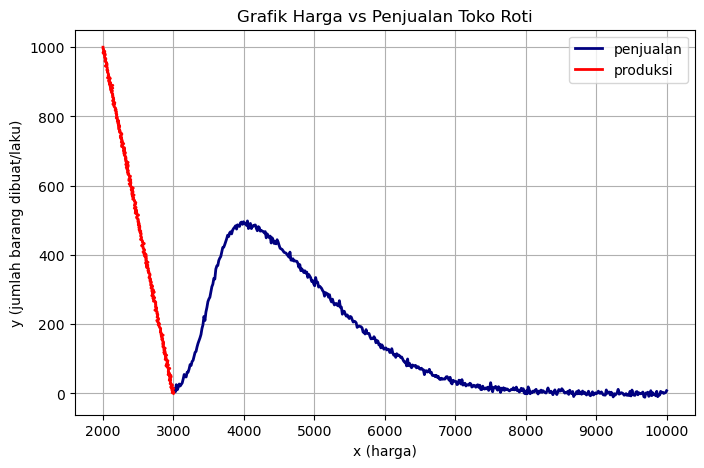

In [18]:
# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color="navy", label='penjualan', linewidth=2)
plt.plot(produksi_z, produksi_y, color="red", label='produksi', linewidth=2)
plt.title("Grafik Harga vs Penjualan Toko Roti")
plt.xlabel("x (harga)")
plt.ylabel("y (jumlah barang dibuat/laku)")
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# tugas:
# hitung volume produksi yang menghasilkan kentungan maksimum 
#    (pendapatan dari penjualan dikurangi produksi)

In [20]:
# Cari keuntungan maksimum
keuntungan = []

for q in range(len(x)):
    jumlah_produksi = produksi_y[q]         # jumlah diproduksi
    biaya_unit = produksi_z[q]              # biaya per unit
    harga_jual = x[q]                       # harga jual
    jumlah_terjual = min(jumlah_produksi, y[q])  # yang terjual maksimal sesuai permintaan
    
    pendapatan = harga_jual * jumlah_terjual
    biaya = biaya_unit * jumlah_produksi
    keuntungan.append(pendapatan - biaya)

keuntungan = np.array(keuntungan)

In [21]:
# posisi keuntungan maksimum
idx_max = np.argmax(keuntungan)
print("Jumlah produksi optimal:", produksi_y[idx_max])
print("Harga jual optimal:", x[idx_max])
print("Keuntungan maksimum:", keuntungan[idx_max])

Jumlah produksi optimal: 300.6012024048096
Harga jual optimal: 5104.208416833668
Keuntungan maksimum: 721199.1606801332


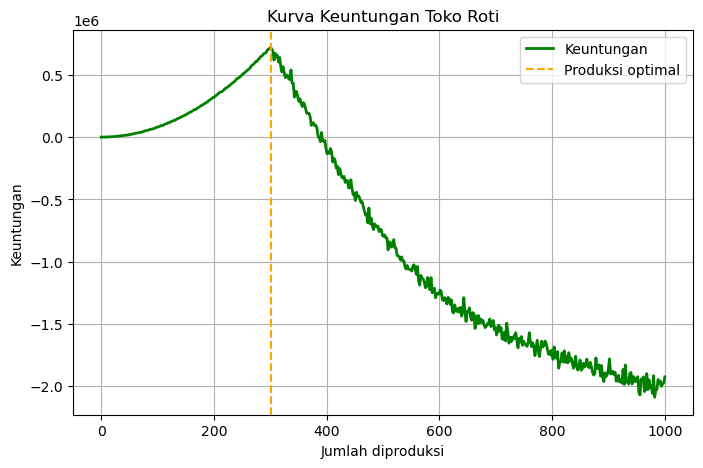

In [22]:
plt.figure(figsize=(8,5))
plt.plot(produksi_y, keuntungan, color="green", linewidth=2, label="Keuntungan")
plt.axvline(produksi_y[idx_max], color="orange", linestyle="--", label="Produksi optimal")
plt.title("Kurva Keuntungan Toko Roti")
plt.xlabel("Jumlah diproduksi")
plt.ylabel("Keuntungan")
plt.legend()
plt.grid(True)
plt.show()

Dari Grafik yang ditampilkan, dapat dilihat keuntungan sebuah toko roti akan meningkat seiring dengan bertambahnya jumlah produksi, namun hanya sampai pada titik tertentu. Keuntungan maksimal dicapai pada level "Produksi optimal" yaitu sekitar 300 unit. Jika toko memproduksi lebih dari jumlah optimal tersebut, keuntungannya akan menurun secara signifikan, bahkan akhirnya akan mengalami kerugian seiring dengan terus bertambahnya jumlah produksi.